<a href="https://colab.research.google.com/github/laura-DGM/Colaboratory/blob/main/Detector_de_ballenas_y_Tiburon_ballena_desde_fotos_a%C3%A9reas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detector de ballenas y Tiburon ballena  desde fotos aéreas
------------------------------------------------------------
intitucion:Universidad Pedagogica y Tecnologica de Colombia
------------------------------------------------------------
por :Laura Alejandra Espitia Mora -2020



In [ ]:
#libreria
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import pandas as pd
from PIL import Image
import random
from sklearn.model_selection import  train_test_split


In [ ]:
from google.colab import drive
descarga_imagenes=drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/My Drive/proyecto IC/imgs_subset'

[Errno 2] No such file or directory: '/My Drive/proyecto IC/imgs_subset'
/content


In [ ]:
ls

drive/  sample_data/


In [ ]:
#variables modificables
img_size=150   #tamaño de imagen
#img_long=100
#img_tall=100

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
ruta_ball="/content/drive/My Drive/proyecto IC/imgs_subset"
ballenas_training=[]
# realizar la reduccion de las imagenes de la carpeta imgs_subset al mismo tamaño
for img in os.listdir (ruta_ball):
  img=cv2.imread(os.path.join(ruta_ball,img))
  img_resize=cv2.resize(img,(img_size,img_size))
  ballenas_training.append([img_resize])
  #print (len(ballenas_training))
  #print (ballenas_training)

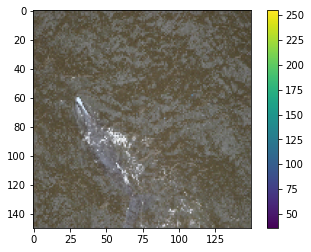

In [ ]:
#grafica de las imagenes despues de cuadrar los tamaños
plt.figure()
plt.imshow(np.squeeze((ballenas_training[201])))  #squeeze indica el numero de la lista
plt.colorbar()
#plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
ruta_tib="/content/drive/My Drive/proyecto IC/BALLENA TIBURON"
tiburon_training=[]
# realizar la reduccion de las imagenes de la carpeta imgs_subset al mismo tamaño
for imgt in os.listdir (ruta_tib):
  imgt=cv2.imread(os.path.join(ruta_tib,imgt))
  imgt_resize=cv2.resize(imgt,(img_size,img_size))
  tiburon_training.append([imgt_resize])
  print (len(tiburon_training))
  print (tiburon_training)

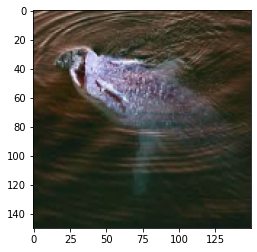

In [ ]:
#grafica de las imagenes despues de cuadrar los tamaños
plt.figure()
plt.imshow(np.squeeze((tiburon_training[39])))  #squeeze indica el numero de la lista
#plt.colorbar()
#plt.grid(True)
plt.show()

In [ ]:
print ("Ballena",len(ballenas_training))#cuantos datos hay en ballenas_training
print ("Tiburon Ballena",len(tiburon_training)) #cuantos datos hay en ballenas_training

Ballena 500
Tiburon Ballena 50


In [ ]:
ImagenesB=np.array(ballenas_training)
print ("Ballena",ImagenesB.shape)
ImagenesT=np.array(tiburon_training)
print ("Ballena Tiburon",ImagenesT.shape)
#(numero de imagenes,,tamaño alto,tamaño largo,coloresRGB)

Ballena (500, 1, 150, 150, 3)
Ballena Tiburon (50, 1, 150, 150, 3)


In [ ]:
#datos de entrenamiento
train_B,test_B=train_test_split(ballenas_training,test_size=0.3,random_state=42)
train_T,test_T=train_test_split(tiburon_training,test_size=0.2,random_state=42)
#random_state=42 permite que siempre se usen los mismos datos de entrenamiento
print("train ballena:",len(train_B))
print("test ballena:",len(test_B))
train_B=np.array(train_B)
test_B=np.array(test_B)
print("Ballena",train_B.shape)


print("train Tiburon Ballena:",len(train_T))
print("test Tiburon Ballena:",len(test_T))
train_T=np.array(train_T)
test_T=np.array(test_T)
print("Tiburon Ballena",train_T.shape)

train ballena: 350
test ballena: 150
Ballena (350, 1, 150, 150, 3)
train Tiburon Ballena: 40
test Tiburon Ballena: 10
Tiburon Ballena (40, 1, 150, 150, 3)


In [ ]:
Images=np.concatenate([train_B,train_T])
print(len(Images))
Images=np.array(Images)
print(Images.shape)

390
(390, 1, 150, 150, 3)


In [ ]:
#inducador de 1 y 0 para las etiquetas
etiquetas_ballenas =np.repeat(0,len(train_B))
etiquetas_Tiburon_ballena =np.repeat(1,len(train_T))
print(len(etiquetas_ballenas))
print(etiquetas_ballenas)
print(len(etiquetas_Tiburon_ballena))
print(etiquetas_Tiburon_ballena)

350
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
40
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [ ]:
#etiqueta de las fotos
class_name=['Ballena franca','Tiburon ballena']

In [ ]:
labels=np.concatenate([etiquetas_ballenas,etiquetas_Tiburon_ballena])
print(len(labels))
print(labels)
Labels=np.array(labels)
#print(Labels.shape)

390
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


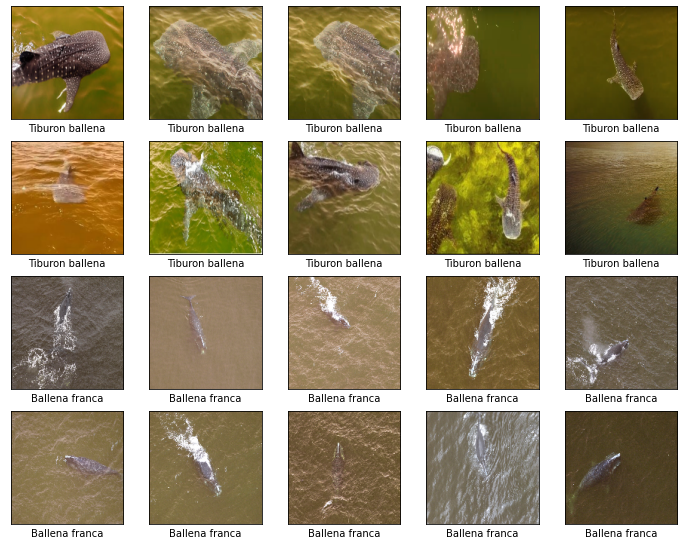

In [ ]:
# imagenes de entrenamiento
plt.figure(figsize=(12, 12))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(Images[359-i]))
    plt.xlabel(class_name[Labels[359-i]])


In [ ]:
#libreria de entrenamiento
from __future__ import absolute_import, division, print_function, unicode_literals

variable_name = ""
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals


# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


In [ ]:
#modelo de clasificacion de keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150,3)),
    keras.layers.Dense(128, activation='relu'),

    keras.layers.Dense(2, activation='softmax'),

])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(np.squeeze(Images), Labels, epochs=30)
trained=model.fit(np.squeeze(Images), Labels, epochs=30)

Epoch 1/30
13/13 [==============================] - 1s 49ms/step - loss: 731.2009 - accuracy: 0.8103
Epoch 2/30
13/13 [==============================] - 1s 48ms/step - loss: 288.4420 - accuracy: 0.8949
Epoch 3/30
13/13 [==============================] - 1s 50ms/step - loss: 236.5589 - accuracy: 0.9513
Epoch 4/30
13/13 [==============================] - 1s 52ms/step - loss: 122.2196 - accuracy: 0.9487
Epoch 5/30
13/13 [==============================] - 1s 49ms/step - loss: 77.6056 - accuracy: 0.9718
Epoch 6/30
13/13 [==============================] - 1s 49ms/step - loss: 36.0374 - accuracy: 0.9821
Epoch 7/30
13/13 [==============================] - 1s 50ms/step - loss: 34.6175 - accuracy: 0.9872
Epoch 8/30
13/13 [==============================] - 1s 51ms/step - loss: 43.0599 - accuracy: 0.9846
Epoch 9/30
13/13 [==============================] - 1s 50ms/step - loss: 25.6744 - accuracy: 0.9897
Epoch 10/30
13/13 [==============================] - 1s 49ms/step - loss: 17.9318 - accuracy: 0.

In [ ]:
#imagen de entrenamiento
imagenes_test=np.squeeze(test_T[1])
print(imagenes_test.shape)
imagenes_test=(np.expand_dims(imagenes_test,0))
print(imagenes_test.shape)

(150, 150, 3)
(1, 150, 150, 3)


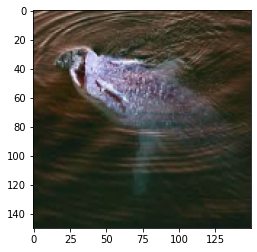

In [ ]:
#la imagen que se usa visualmente
plt.figure()
plt.imshow(np.squeeze(test_T[1]))
plt.show()

In [ ]:
#resultado de la clasificacion
predictions_signgle=model.predict(imagenes_test)
print(predictions_signgle)
print(np.sum(predictions_signgle))
print(np.argmax(predictions_signgle))
print(class_name[np.argmax(predictions_signgle)])

[[0. 1.]]
1.0
1
Tiburon ballena


(160, 1, 150, 150, 3)
[[1. 0.]]
1.0
0
Ballena franca


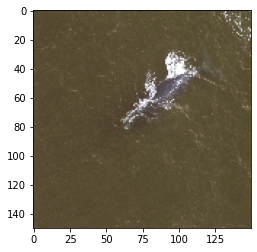

In [ ]:
#se tiene  160 imagenes de prueba
v=random.randrange(160);
varia=np.concatenate([test_B,test_T])
print(varia.shape)
varia=np.squeeze(varia[v])
varia=np.expand_dims(varia,0)
predictions_signgle=model.predict(varia)
print(predictions_signgle)
print(np.sum(predictions_signgle))
print(np.argmax(predictions_signgle))
nombre=class_name[np.argmax(predictions_signgle)]
print(nombre)
plt.figure()
plt.imshow(np.squeeze(varia))
plt.show()


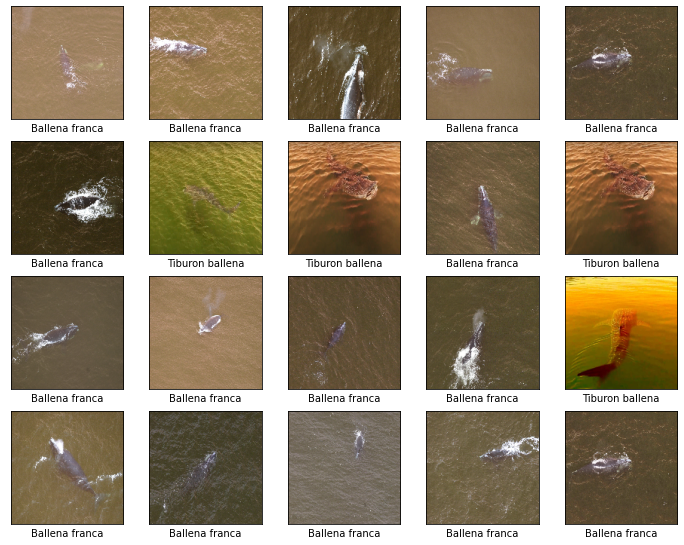

In [ ]:
# imagenes de entrenamiento

varia=np.concatenate([test_B,test_T])
plt.figure(figsize=(12, 12))
for i in range(20):
  plt.subplot(5, 5, i + 1)
  v=(random.randrange(159))
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  var=np.squeeze(varia[v])
  var=np.expand_dims(var,0)
  predictions_signgle=model.predict(var)
  plt.imshow(np.squeeze(var))
  plt.xlabel(class_name[np.argmax(predictions_signgle)])